In [3]:
import alphashape
import numpy as np
import os
import pandas as pd


def make_alpha_hull(xy, alpha=1):
    alpha_shape = alphashape.alphashape(xy, alpha)
    xH, yH = alpha_shape.boundary.coords.xy
    return np.vstack([xH, yH]).T


all_data = []
for keyword in ['random', 'kmeans']:
    df = pd.read_csv(os.path.join('data', 'embeddings', f'polymers-umap-{keyword}.txt'), header=None, names=['Sequence', 'Z0', 'Z1'])
    all_data.append(df)

orig_data = pd.concat(all_data)
orig_hull = make_alpha_hull(orig_data.loc[:, 'Z0':'Z1'])

100%|██████████| 107/107 [00:02<00:00, 48.84it/s]


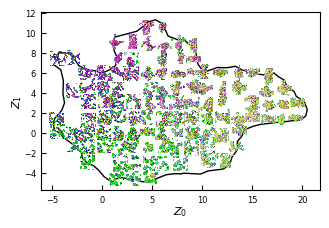

In [5]:
import glob
from matplotlib import pyplot as plt
from matplotlib import offsetbox
import tqdm

def make_annotated_umap(data, image_path):
    fig, ax = plt.subplots(figsize=(3.6, 2.4))
    ax.plot(*orig_hull.T, 'k-', lw=1, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlabel('$Z_0$', labelpad=0, fontsize=8)
    ax.set_ylabel('$Z_1$', labelpad=0, fontsize=8)
    ax.tick_params(which='both', direction='in')
    ax.tick_params(axis='both', which='major', labelsize=6)
    
    png_files = sorted(glob.glob(f'{image_path}/*.png'))
    txt_files = sorted(glob.glob(f'{image_path}/*.txt'))
    with open(txt_files[0], 'r') as fid:
        filenames = [it.split('/')[-1].strip() for it in fid.readlines()]
    
    prog = tqdm.tqdm(enumerate(png_files), total=len(png_files))
    for i, png in prog:
        
        arr_img = plt.imread(png, format='png')
     
        arr_img[arr_img[:, :, :-1].min(axis=2) > 0.95, -1] = 0.0
     
        seq = filenames[i].split('_seq_')[1].split('_run_')[0]
        idx = data['Sequence'] == seq
        xy = data.loc[idx, 'Z0':'Z1'].values[0].flatten()
    
        imagebox = offsetbox.OffsetImage(arr_img, zoom=0.020)
        imagebox.image.axes = ax
    
        ab = offsetbox.AnnotationBbox(imagebox, xy, xycoords='data', frameon=False, zorder=1)
        
        ax.add_artist(ab)
        
    return fig

image_path = os.path.join('data', 'snapshots')
fig = make_annotated_umap(orig_data, image_path)

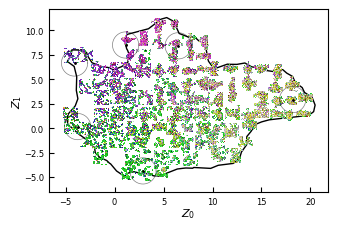

In [6]:
from target_defs import archetype_predictions as arch

t = np.linspace(0, 2*np.pi)
circ_points = np.vstack([np.cos(t), np.sin(t)]).T  # radius = 1

for k, v in arch.items():
    fig.gca().plot(*v, 'k.', ms=2)
    fig.gca().plot(*(1.34 * circ_points + v).T, 'k-', alpha=0.5, lw=0.5)
fig

In [ ]:
fig.savefig(os.path.join("figures", "fig1b.pdf"), dpi=600, bbox_inches='tight')